In [1]:
import pandas as pd

# Load the labeled rookie dataset
df = pd.read_csv("../data/processed/labeled_rookie_data.csv")
print("Shape:", df.shape)
df.head()

Shape: (700, 16)


,Player,Year,MP,G,MPG,Pos,Age,Tm,PER,USG%,VORP,BPM,PTS,AST,TRB,is_rotation_player
0,David Andersen,2010.0,891.0,63.0,14.142857,C,29.0,HOU,12.1,20.2,-0.4,-3.8,367.0,44.0,208.0,0
1,Antonio Anderson,2010.0,15.0,1.0,15.000000,SF,24.0,OKC,-1.7,12.0,0.0,-11.4,2.0,0.0,1.0,1
2,Jeff Ayres,2010.0,405.0,39.0,10.384615,C,22.0,POR,12.1,10.1,-0.1,-2.9,104.0,1.0,98.0,0
3,Rodrigue Beaubois,2010.0,700.0,56.0,12.500000,PG,21.0,DAL,18.5,24.7,0.6,1.3,397.0,74.0,78.0,1
4,DeJuan Blair,2010.0,1494.0,82.0,18.219512,PF,20.0,SAS,17.7,20.8,1.0,0.7,638.0,65.0,526.0,1


In [3]:
# Features we'll use to train the model
feature_cols = ['PTS', 'AST', 'TRB', 'VORP', 'BPM', 'PER', 'USG%']

# Drop rows with missing values in these columns
df = df.dropna(subset=feature_cols + ['is_rotation_player'])

# Feature matrix (X) and label (y)
X = df[feature_cols]
y = df['is_rotation_player']

print("Features and target prepared.")

Features and target prepared.


In [4]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 559
Test set size: 140


In [5]:
from sklearn.linear_model import LogisticRegression

# Train baseline model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model trained.")

Model trained.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Evaluation Metrics:
Accuracy: 0.7785714285714286
Precision: 0.8026315789473685
Recall: 0.7922077922077922
Confusion Matrix:
 [[48 15]
 [16 61]]


In [7]:
# Show which features had the most impact
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Weight': model.coef_[0]
}).sort_values(by='Weight', ascending=False)

feature_importance

,Feature,Weight
4,BPM,0.116340
1,AST,0.014614
6,USG%,0.007175
2,TRB,0.006581
0,PTS,0.003561
3,VORP,-0.020740
5,PER,-0.046140


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)
print("Random Forest trained.")

Random Forest trained.


In [10]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred))

print("\n Random Forest:")
print(classification_report(y_test, y_rf_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76        63
           1       0.80      0.79      0.80        77

    accuracy                           0.78       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.78      0.78      0.78       140


 Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        63
           1       0.82      0.78      0.80        77

    accuracy                           0.79       140
   macro avg       0.78      0.79      0.78       140
weighted avg       0.79      0.79      0.79       140



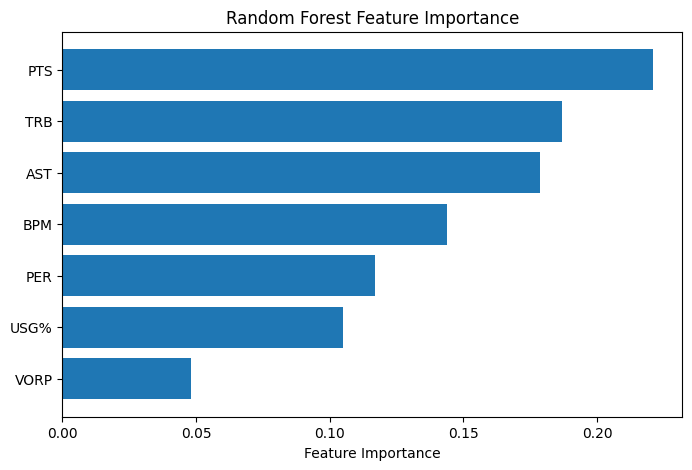

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [12]:
import joblib

joblib.dump(rf_model, "../data/processed/final_model.joblib")
print("Model saved to: data/processed/final_model.joblib")

Model saved to: data/processed/final_model.joblib
